In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import linear_model, neighbors, ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier,RandomForestRegressor, GradientBoostingRegressor

# Import Dataframes

In [6]:
diabetic_df = pd.read_csv("nondiabetes_vs_diabetes_FE.csv") # Compares non-diabetic patients to those with full diabetes
pre_diabetic_df = pd.read_csv("nondiabetes_vs_prediabetes_FE.csv") #Compares non-diabetic patients to those with pre-diabetes

### Column Overviews

In [7]:
diabetic_df.columns

Index(['Diabetes_02', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age',
       'PhysActDiffWalk', 'AnyHCNoDocCostCholCheck', 'FruitsVeggies',
       'HighBPChol', 'EducIncome'],
      dtype='object')

In [8]:
pre_diabetic_df.columns 

Index(['Diabetes_01', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age',
       'PhysActDiffWalk', 'AnyHCNoDocCostCholCheck', 'FruitsVeggies',
       'HighBPChol', 'EducIncome'],
      dtype='object')

### Target & feature column differentiations for the 2 dfs (prediabetic & full)

In [9]:
yf = diabetic_df["Diabetes_02"]
Xf = diabetic_df.drop(columns=["Diabetes_02"])
yp = pre_diabetic_df["Diabetes_01"]
Xp = pre_diabetic_df.drop(columns=["Diabetes_01"])

# Model Creation

#### Full vs non-diab models

In [10]:
knn_f = KNeighborsClassifier()
dt_f = DecisionTreeClassifier()
lr_f = LogisticRegression(C=1000)
rf_f = RandomForestClassifier()
rf_ens_f = ensemble.RandomForestClassifier(n_estimators=100, random_state=1)
et_f = ensemble.ExtraTreesClassifier(n_estimators=100, random_state=1)

#### Pre- vs non-diab models

In [11]:
knn_p = KNeighborsClassifier()
dt_p = DecisionTreeClassifier()
lr_p = LogisticRegression(C=1000)
rf_p = RandomForestClassifier()
rf_ens_p = ensemble.RandomForestClassifier(n_estimators=100, random_state=1)
et_p = ensemble.ExtraTreesClassifier(n_estimators=100, random_state=1)

### Training & Testing Subset Creation

In [12]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf,yf,test_size=.3,random_state=42)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp,yp,test_size=.3,random_state=42)

### Scale training data

In [13]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [14]:
std.fit(Xf_train.values)
Xf_train_tr = std.transform(Xf_train.values)

In [15]:
std.fit(Xp_train.values)
Xp_train_tr = std.transform(Xp_train.values)

### GridSearchCV Parameters

In [17]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [18]:
###full diabetes rf & et, prediabetes dt

In [25]:
from sklearn.model_selection import GridSearchCV

In [28]:
#params1={"n_neighbors": range(0,150,25), "weights": weight_types}
#params2= {'C': np.logspace(-3,3,7),'class_weight':[{0:1,1:1},{0:2,1:1},{0:3,1:1},{0:4,1:1}]}
params2={"max_depth": range(5,20,5), "min_samples_leaf": range(1,15,5), 
         "n_estimators":[200,500],'class_weight':[{0:1,1:1},{0:2,1:1},{0:3,1:1},{0:4,1:1}]}
params3={"max_features": range(1,14,1), "min_samples_leaf": range(1,15,5)}

In [29]:
model_scoring_list = [(rf_ens_f,params2,"rf_ens_f",Xf_train_tr,yf_train),(et_f,params2,"et_f",Xf_train_tr,yf_train),
                 (dt_p,params3,"dt_p",Xp_train_tr,yp_train)]

In [30]:
for each_model in model_scoring_list:
    model_name, parameter_list, model_log,curr_x_train,curr_y_train = each_model
    Grid=GridSearchCV(estimator=eval(model_log), param_grid=parameter_list, 
                      scoring='roc_auc',
                      n_jobs=-1, cv=2, verbose=3)
    model = Pipeline([
        ('sampling', RandomUnderSampler(.2)), # positive ratio of .2 up from 0.0016
        ('classification', Grid)
    ]).fit(curr_x_train,curr_y_train)

    
    globals()['Grid%s' % model_log]=pd.DataFrame(Grid.cv_results_)  

C:\Users\Francesca P\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


Fitting 2 folds for each of 72 candidates, totalling 144 fits


C:\Users\Francesca P\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


Fitting 2 folds for each of 72 candidates, totalling 144 fits


C:\Users\Francesca P\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.2 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


Fitting 2 folds for each of 39 candidates, totalling 78 fits


In [33]:
Grid_dt_p.sort_values(by='mean_test_score').loc[0:2]

NameError: name 'Grid_dt_p' is not defined

In [37]:
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, StackingClassifier

In [ ]:
#(dt_p,params3,"dt_p",Xp_train_tr,yp_train)
#,("dt_p",dt_p)

In [35]:
model_list = [("rf_ens_f",rf_ens_f),("et_f",et_f)]

In [ ]:
model_scoring_list_2 = [(rf_ens_f,params2,"rf_ens_f",Xf_train_tr,yf_train),(et_f,params2,"et_f",Xf_train_tr,yf_train)]

In [38]:
stacked = StackingClassifier(model_list, final_estimator=ensemble.RandomForestClassifier(),n_jobs=-1)

stacked.fit(Xf_train_tr, yf_train)
probas=stacked.predict_proba(Xf_test)[:,1]
roc_auc_score(yf_test,probas)

0.497327584593781

In [39]:
from sklearn.metrics import precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt

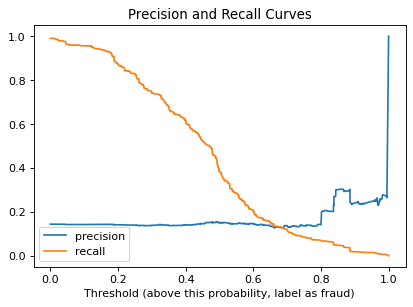

In [40]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(yf_test, stacked.predict_proba(Xf_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [42]:
probas_threshold = stacked.predict_proba(Xf_test)[:, 1] >= .05
print("stacked confusion matrix: \n\n", confusion_matrix(yf_test, probas_threshold))

stacked confusion matrix: 

 [[ 1783 62205]
 [  401 10326]]


In [ ]:
### Check coefficients. Refit data outside above loops

In [44]:
rf_ens_f.fit(Xf_train_tr,yf_train)

RandomForestClassifier(random_state=1)

In [45]:
feature_df=pd.DataFrame({'feats':Xf_train.columns,'importances':rf_ens_f.feature_importances_})


,feats,importances
4,HvyAlcoholConsump,0.007966
2,Stroke,0.011727
3,HeartDiseaseorAttack,0.020556
11,AnyHCNoDocCostCholCheck,0.023363
8,Sex,0.027626
1,Smoker,0.031624
10,PhysActDiffWalk,0.042373
12,FruitsVeggies,0.052291
13,HighBPChol,0.068081
6,MentHlth,0.069262


In [48]:
feature_df.sort_values(by='importances',ascending=True)

,feats,importances
0,BMI,0.203758
14,EducIncome,0.137511
9,Age,0.133986
7,PhysHlth,0.091974
5,GenHlth,0.077901
6,MentHlth,0.069262
13,HighBPChol,0.068081
12,FruitsVeggies,0.052291
10,PhysActDiffWalk,0.042373
1,Smoker,0.031624


### Fit models to scaled, oversampled training data

In [52]:
knn_f.fit(Xf_train_tr,yf_train)
dt_f.fit(Xf_train_tr,yf_train)
lr_f.fit(Xf_train_tr,yf_train)
rf_f.fit(Xf_train_tr,yf_train)
rf_ens_f.fit(Xf_train_tr,yf_train)
et_f.fit(Xf_train_tr,yf_train)

ExtraTreesClassifier(random_state=1)

In [53]:
knn_p.fit(Xp_train_tr,yp_train)
dt_p.fit(Xp_train_tr,yp_train)
lr_p.fit(Xp_train_tr,yp_train)
rf_p.fit(Xp_train_tr,yp_train)
rf_ens_p.fit(Xp_train_tr,yp_train)
et_p.fit(Xp_train_tr,yp_train)

ExtraTreesClassifier(random_state=1)

# Scoring Metrics

## Accuracy, Precision & Recall

#### Scoring Predictions for Full vs Non-Diab DF

In [22]:
yf_knn_predict = knn_f.predict(Xf_test)
yf_dt_predict = dt_f.predict(Xf_test)
yf_lr_predict = lr_f.predict(Xf_test)
yf_rf_predict = rf_f.predict(Xf_test)
yf_rf_ens_predict = rf_ens_f.predict(Xf_test)
yf_et_predict = et_f.predict(Xf_test)

#### Scoring Predictions for Pre- vs Non-Diab DF

In [23]:
yp_knn_predict = knn_p.predict(Xp_test)
yp_dt_predict = dt_p.predict(Xp_test)
yp_lr_predict = lr_p.predict(Xp_test)
yp_rf_predict = rf_p.predict(Xp_test)
yp_rf_ens_predict = rf_ens_p.predict(Xp_test)
yp_et_predict = et_p.predict(Xp_test)

### Scoring Metric Function

In [24]:
def quick_scoring(model_list):
    for model in model_list:
        curr_name, curr_type, curr_model,curr_prediction,curr_x_train,curr_y_train,curr_x_test,curr_y_test = model
        curr_model.fit(curr_x_train,curr_y_train)
        print("Default threshold for ",curr_type,"Diabetes",curr_name,":")
        print("Accuracy: {:6.4f}, Precision: {:6.4f},   Recall: {:6.4f},   F1 Score: {:6.4f},   F2 Score: {:6.4f}".format(curr_model.score(curr_x_test,curr_y_test),
                                                     precision_score(curr_y_test, curr_prediction, average='macro'), 
                                                     recall_score(curr_y_test, curr_prediction, average='macro'),
                                                     f1_score(curr_y_test, curr_prediction, average='macro'),
                                                     fbeta_score(curr_y_test, curr_prediction, 2, average='macro')))

#### Model list

In [25]:
# Format is (model_type, DF_identifier, model_name, prediction, x_train, y_train, x_test,y_test)

In [26]:
model_scoring_list=[("knn","Full",knn_f,yf_knn_predict,Xf_train_tr,yf_train,Xf_test,yf_test),
                   ("dt","Full",dt_f,yf_dt_predict,Xf_train_tr,yf_train,Xf_test,yf_test),
                   ("lr","Full",lr_f,yf_lr_predict,Xf_train_tr,yf_train,Xf_test,yf_test),
                   ("rf","Full",rf_f,yf_rf_predict,Xf_train_tr,yf_train,Xf_test,yf_test),
                   ("rf_ens","Full",rf_ens_f,yf_rf_ens_predict,Xf_train_tr,yf_train,Xf_test,yf_test),
                   ("et","Full",et_f,yf_et_predict,Xf_train_tr,yf_train,Xf_test,yf_test),
                   ("knn","Pre-",knn_p,yp_knn_predict,Xp_train_tr,yp_train,Xp_test,yp_test),
                   ("dt","Pre-",dt_p,yp_dt_predict,Xp_train_tr,yp_train,Xp_test,yp_test),
                   ("lr","Pre-",lr_p,yp_lr_predict,Xp_train_tr,yp_train,Xp_test,yp_test),
                   ("rf","Pre-",rf_p,yp_rf_predict,Xp_train_tr,yp_train,Xp_test,yp_test),
                   ("rf_ens","Pre-",rf_ens_p,yp_rf_ens_predict,Xp_train_tr,yp_train,Xp_test,yp_test),
                   ("et","Pre-",et_p,yp_et_predict,Xp_train_tr,yp_train,Xp_test,yp_test)]

#### Function Results

In [27]:
quick_scoring(model_scoring_list)

Default threshold for  Full Diabetes knn :


C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy: 0.8065, Precision: 0.5521,   Recall: 0.5365,   F1 Score: 0.5399,   F2 Score: 0.5371
Default threshold for  Full Diabetes dt :
Accuracy: 0.4030, Precision: 0.4306,   Recall: 0.3650,   F1 Score: 0.3157,   F2 Score: 0.3136


C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Default threshold for  Full Diabetes lr :
Accuracy: 0.1436, Precision: 0.0718,   Recall: 0.5000,   F1 Score: 0.1255,   F2 Score: 0.2280


C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Default threshold for  Full Diabetes rf :


C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy: 0.7492, Precision: 0.5586,   Recall: 0.6167,   F1 Score: 0.5207,   F2 Score: 0.5491
Default threshold for  Full Diabetes rf_ens :


C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy: 0.6610, Precision: 0.5548,   Recall: 0.6006,   F1 Score: 0.5400,   F2 Score: 0.5612
Default threshold for  Full Diabetes et :


C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy: 0.6876, Precision: 0.5737,   Recall: 0.6322,   F1 Score: 0.5666,   F2 Score: 0.5915
Default threshold for  Pre- Diabetes knn :


C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy: 0.9787, Precision: 0.4893,   Recall: 0.5000,   F1 Score: 0.4946,   F2 Score: 0.4978
Default threshold for  Pre- Diabetes dt :
Accuracy: 0.9312, Precision: 0.5028,   Recall: 0.5201,   F1 Score: 0.4698,   F2 Score: 0.4682


C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Default threshold for  Pre- Diabetes lr :
Accuracy: 0.0215, Precision: 0.5107,   Recall: 0.5001,   F1 Score: 0.0211,   F2 Score: 0.0493


C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Default threshold for  Pre- Diabetes rf :


C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy: 0.9787, Precision: 0.4893,   Recall: 0.5000,   F1 Score: 0.4946,   F2 Score: 0.4978
Default threshold for  Pre- Diabetes rf_ens :


C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy: 0.9787, Precision: 0.4893,   Recall: 0.5000,   F1 Score: 0.4946,   F2 Score: 0.4978
Default threshold for  Pre- Diabetes et :
Accuracy: 0.9787, Precision: 0.4893,   Recall: 0.5000,   F1 Score: 0.4946,   F2 Score: 0.4978


C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Francesca P\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# ROC/AUC Curve

### Predictions for ROC/AUC Curve

#### Non-Diabetic vs Full Diabetes Prediction Arrays

In [54]:
yf_knn_predict_proba = knn_f.predict_proba(Xf_test)[:,1] #gives back one column of positive/negative
yf_dt_predict_proba = dt_f.predict_proba(Xf_test)[:,1] #use for ROC/AUC
yf_lr_predict_proba = lr_f.predict_proba(Xf_test)[:,1]
yf_rf_predict_proba = rf_f.predict_proba(Xf_test)[:,1]
yf_rf_ens_predict_proba = rf_ens_f.predict_proba(Xf_test)[:,1]
yf_et_predict_proba = et_f.predict_proba(Xf_test)[:,1]

#### Non-Diabetic vs Pre-Diabetic Prediction Arrays

In [55]:
yp_knn_predict_proba = knn_p.predict_proba(Xp_test)[:,1]
yp_dt_predict_proba = dt_p.predict_proba(Xp_test)[:,1]
yp_lr_predict_proba = lr_p.predict_proba(Xp_test)[:,1]
yp_rf_predict_proba = rf_p.predict_proba(Xp_test)[:,1]
yp_rf_ens_predict_proba = rf_ens_p.predict_proba(Xp_test)[:,1]
yp_et_predict_proba = et_p.predict_proba(Xp_test)[:,1]

## ROC Curve Function

In [56]:
from matplotlib.pyplot import figure

In [57]:
def roc_curve_subplots(model_list,test_var):
    count = 1
    for model in model_list:
        curr_name,curr_type, curr_model = model
        fpr2, tpr2, thresholds2 = roc_curve(test_var,curr_model)
        figure(figsize=(15,10))
        plt.subplot(3,2,count)
        plt.plot(fpr2, tpr2,lw=2)
        plt.plot([0,1],[0,1],c='violet',ls='--')
        plt.xlim([-0.05,1.05])
        plt.ylim([-0.05,1.05])

        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve for ' + curr_type + 'diabetes detection ' + curr_name)
        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4);
        print("ROC AUC score for",curr_type,curr_name,"= ", roc_auc_score(test_var, curr_model))
        count+=1

In [58]:
fullnone_prediction_list = [("knn_predict","Full",yf_knn_predict_proba),("dt_predict","Full",yf_dt_predict_proba),("lr_predict","Full",yf_lr_predict_proba),("rf_predict","Full",yf_rf_predict_proba),
                           ("rf_ens_predict","Full",yf_rf_ens_predict_proba),("rf_et_predict","Full",yf_et_predict_proba)]
prenone_prediction_list = [("knn_predict","Pre-",yp_knn_predict_proba),("dt_predict","Pre-",yp_dt_predict_proba),("lr_predict","Pre-",yp_lr_predict_proba),("rf_predict","Pre-",yp_rf_predict_proba),
                           ("rf_ens_predict","Pre-",yp_rf_ens_predict_proba),("rf_et_predict","Pre-",yp_et_predict_proba)]

### Results for Full-Diabetic vs Non

ROC AUC score for Full knn_predict =  0.5858874084826395
ROC AUC score for Full dt_predict =  0.40171708601860473
ROC AUC score for Full lr_predict =  0.7718053792061401
ROC AUC score for Full rf_predict =  0.7065757817028933
ROC AUC score for Full rf_ens_predict =  0.6161473406041296
ROC AUC score for Full rf_et_predict =  0.7049223337176131


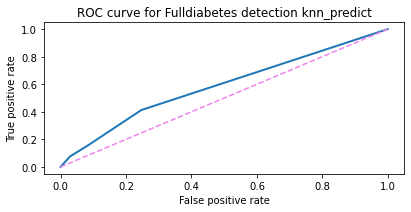

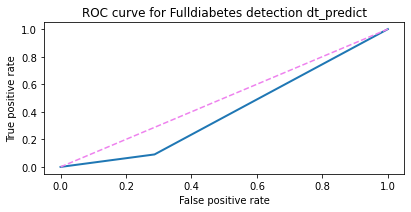

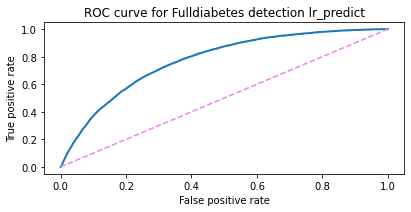

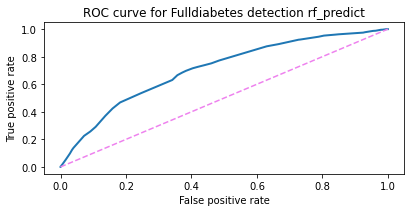

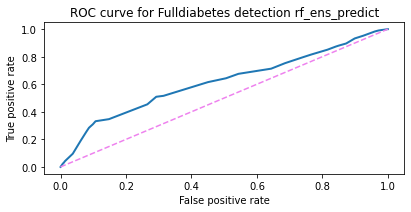

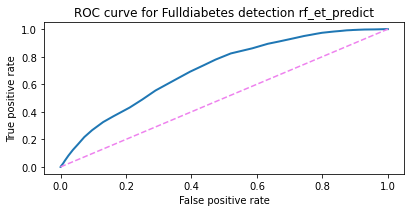

In [61]:
roc_curve_subplots(fullnone_prediction_list,yf_test)

### Results for Pre-Diabetic vs Non

ROC AUC score for Pre- knn_predict =  0.4662107580930252
ROC AUC score for Pre- dt_predict =  0.5222527744322069
ROC AUC score for Pre- lr_predict =  0.7127346040484693
ROC AUC score for Pre- rf_predict =  0.4536578537532039
ROC AUC score for Pre- rf_ens_predict =  0.4901180251373432
ROC AUC score for Pre- rf_et_predict =  0.44651981430903953


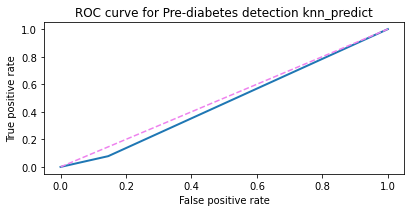

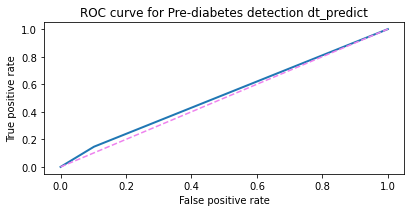

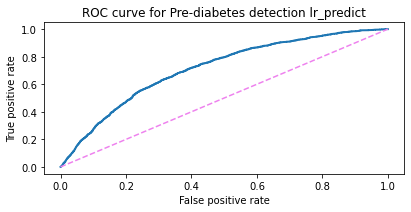

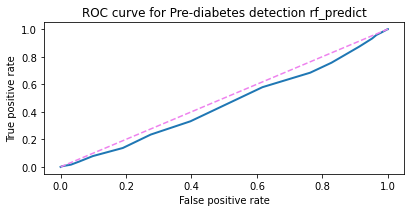

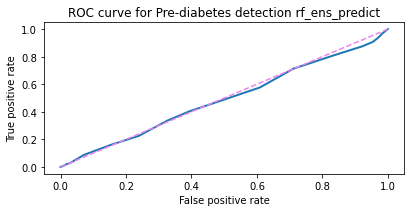

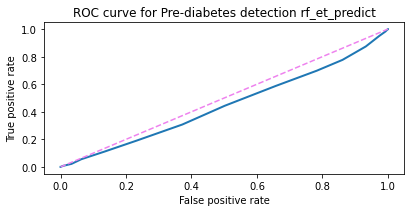

In [60]:
roc_curve_subplots(prenone_prediction_list,yp_test)